In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import json
import seaborn as sns
from random import randint, choice
from os import path
from main_data import (
    key_to_camelot,
    open_wheel,
    add_features,
    get_playlist,
    get_friendly,
    pickl,
    unpickl,
    sp,
)


In [ ]:
# %store -r streams_df streams_af_df no_skip_df playlist_af_df
# streams_df, streams_af_df, no_skip_df, playlist_af_df = streams_df, streams_af_df, no_skip_df, playlist_af_df

In [3]:
# Import DataFrames generated by main_data.py
def imp():
    global all_streams_df, streams_df, streams_af_df, no_skip_df, playlist_af_df, pod_df, wheel_df
    (
        all_streams_df,
        streams_df,
        streams_af_df,
        no_skip_df,
        playlist_af_df,
        pod_df,
        wheel_df,
    ) = unpickl(
        "all_streams_df.p",
        "streams_df.p",
        "streams_af_df.p",
        "no_skip_df.p",
        "playlist_af_df.p",
        "podcasts_df.p",
        "wheel_df.p",
    )
    # return all_streams_df, streams_df, streams_af_df, no_skip_df, playlist_af_df, pod_df, wheel_df = import_all()

# todo: move to main

def hpm_rollback(pod):
    # refactoring of hpm() that works with pandas 1.4.2
    pod.loc[:, "hours"] = pod.loc[:, "playtime"].copy() / 3600
    pod.index = pod.timestamp
    podm = (
        pod.copy()
        .loc[:, "hours"]
        .resample("M")
        .apply(lambda x: np.sum(x.values))
        .round()
    )
    podm_gb = (
        podm.groupby(podm.index.strftime("%b"))
        .resample("Y")
        .apply(lambda x: np.sum(x.values))
        .round()
        .droplevel(level=1)
    )
    podm_gb = podm_gb.groupby(podm_gb.index).mean()
    return podm_gb


def hpm(df):
    df.loc[:, "hours"] = df.loc[:, "playtime"].copy() / 3600
    df = df.groupby(['month', pd.Grouper(key='timestamp', freq='Y')])['playtime'].sum().groupby("month").mean()
    return df

def plthpm(sgb):
    return sns.barplot(data=sgb.iloc[0:0], x=sgb.values, y=sgb.index)

# def plothpm(
#     plt.rcParams["figure.figsize"] = (8, 8)
# sns.barplot(data=podm_gb, x=podm_gb["hours"], y=podm_gb.index)
# )


def top_songs(years="all", skips=False, features=True):
    if skips and features:
        df = streams_af_df
    elif not skips:
        df = df.query("(playtime / duration) > 0.51").reset_index()
    # todo complete this

def format_td(td):
    """Converts timedelta to hh:mm:ss strictly for presentation purposes"""
    minutes, seconds = divmod(td.seconds + td.days * 86400, 60)
    hours, minutes = divmod(minutes, 60)
    return "{:d}:{:02d}:{:02d}".format(hours, minutes, seconds, td.microseconds)

def jsn(df, name):
    return df.to_json(path.join("data", name))

def dfjsn(*df):
    for name in df:
        yield pd.read_json(path.join("data", name))

In [9]:
imp()
streams_af_df.timestamp = streams_af_df.timestamp.dt.tz_convert("America/New_York")
#todo convert abq listening to mountain

In [ ]:
# I don't recall listening to this artist so much. Investigating if it was on repeat on accident or something.
why_tala = streams_af_df#.query('"Hope Tala" in artist')
why_why_tala = (
    why_tala.loc[:, ['playtime', 'timestamp']].groupby(by=why_tala.dtime)
    .sum(numeric_only=True)
    .sort_values(by="playtime", ascending=False))
why_why_tala["playtime"] = why_why_tala["playtime"].apply(lambda x: x / 3600)
why_why_tala.head(50)


In [ ]:
q# Looks like I just let her run on most popular song repeat for a few hours.
streams_af_df.query('date == "11/27/2019"').sort_values(by="timestamp")


In [ ]:
no_skip_df.query('artist.str.contains("(?i)miles davis")', engine="python")


In [53]:
[streams_df.year.unique().values]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [5]:
def randyear(df):
    return choice(range(streams_df.timestamp.dt.year.min(), 
                        streams_df.timestamp.dt.year.max() +1))

In [5]:
streams_af_df

,artist,track,album,duration,playtime,date,time,dtime,ddate,day,month,year,tempo,camelot,key_signature,start,end,shuffle,id,timestamp
0,Rich Boy,Throw Some D's Remix,Rich Boy,351,351,03/25/2021,18:43:26,18:43:26,2021-03-25,Thu,Mar,2021,161,12A,D-flat minor,trackdone,trackdone,False,1qXLj4ywjsA0hGmaibmnn3,2021-03-25 18:43:26+00:00
1,Rich Boy,Throw Some D's Remix,Rich Boy,351,156,08/07/2021,05:06:29,05:06:29,2021-08-07,Sat,Aug,2021,161,12A,D-flat minor,clickrow,endplay,False,1qXLj4ywjsA0hGmaibmnn3,2021-08-07 05:06:29+00:00
2,Rich Boy,Throw Some D's Remix,Rich Boy,351,351,01/21/2021,05:42:09,05:42:09,2021-01-21,Thu,Jan,2021,161,12A,D-flat minor,trackdone,trackdone,False,1qXLj4ywjsA0hGmaibmnn3,2021-01-21 05:42:09+00:00
3,Rich Boy,Throw Some D's Remix,Rich Boy,351,0,10/18/2019,18:04:48,18:04:48,2019-10-18,Fri,Oct,2019,161,12A,D-flat minor,clickrow,endplay,False,1qXLj4ywjsA0hGmaibmnn3,2019-10-18 18:04:48+00:00
4,Rich Boy,Throw Some D's Remix,Rich Boy,351,2,02/17/2022,11:15:58,11:15:58,2022-02-17,Thu,Feb,2022,161,12A,D-flat minor,fwdbtn,fwdbtn,True,1qXLj4ywjsA0hGmaibmnn3,2022-02-17 11:15:58+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85407,James Blake,Frozen (feat. JID & SwaVay),Friends That Break Your Heart,236,236,09/30/2022,03:19:58,03:19:58,2022-09-30,Fri,Sep,2022,100,6B,B-flat major,trackdone,trackdone,False,4IX1G5Ibs3aWyiSLUO7OPt,2022-09-30 03:19:58+00:00
85408,Teitanblood,Anteinfierno,Death,297,297,09/25/2021,04:34:37,04:34:37,2021-09-25,Sat,Sep,2021,101,6A,G minor,clickrow,trackdone,False,2uFlPURngrcfsOz1nHgpaO,2021-09-25 04:34:37+00:00
85409,Xenia Rubinos,How Strange It Is,Black Terry Cat,192,192,12/06/2019,04:52:04,04:52:04,2019-12-06,Fri,Dec,2019,112,11B,A major,trackdone,trackdone,False,0ta023auUvOMAhzQ4oIRF9,2019-12-06 04:52:04+00:00
85410,Master P,Meal Ticket,I'm Bout It,244,244,01/19/2021,01:55:48,01:55:48,2021-01-19,Tue,Jan,2021,152,10B,D major,trackdone,trackdone,False,5TIGd8F70sI5mk6U4bubX8,2021-01-19 01:55:48+00:00


In [ ]:
result = sp.search("Black Dove")
track = result['tracks']['items'][0]

artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
print("artist genres:", artist["genres"])
"""
how to aggregate playtime when results are lisre
of genres?

query genres for all tracks
"""

imp()
print(type([[artist["genres"]]]))
#genre = pd.DataFrame({"artist": "Teebs", "genre": artist["genres"]})
sorte = streams_af_df.sort_values(by="playtime")
genre = sorte.iloc[0:7, :]
print(genre)
genre["jenre"] = [[artist["genres"][0]]]
#genre = genre.explode("genre")
genre

#going to need to collapse into just artists and playtime before 
# exploding"

In [26]:
streams_af_df.sort_values(by="playtime")

,artist,track,album,duration,playtime,date,time,dtime,ddate,day,month,year,tempo,camelot,key_signature,start,end,shuffle,id,timestamp
47809,Ludwig van Beethoven,"Piano Sonata No. 11 In B Flat Major, Op. 22: 4...",Beethoven: The Piano Sonatas,371,0,04/04/2020,14:15:08,14:15:08,2020-04-04,Sat,Apr,2020,131,6B,B-flat major,backbtn,backbtn,False,4W1CenpP9ZxvSwhRHkgVF6,2020-04-04 14:15:08+00:00
3782,Main Source,Just a Friendly Game of Baseball - 2017 Remast...,Breaking Atoms,202,0,05/07/2021,14:13:54,14:13:54,2021-05-07,Fri,May,2021,94,11A,F-sharp minor,trackdone,trackdone,False,3gI4WHUyXCP96IQb9hzxnJ,2021-05-07 14:13:54+00:00
16421,Aphex Twin,Nanou2,Drukqs,205,0,01/04/2020,05:15:09,05:15:09,2020-01-04,Sat,Jan,2020,93,4B,A-flat major,backbtn,fwdbtn,False,6Wei2NUSG66WzLiqSuQAy5,2020-01-04 05:15:09+00:00
82851,Sasha Carassi,Nomads,Kill The Monster EP,416,0,04/15/2022,10:01:06,10:01:06,2022-04-15,Fri,Apr,2022,122,12A,D-flat minor,fwdbtn,fwdbtn,False,6z8CNKl6hK2yAvqnUXZeoU,2022-04-15 10:01:06+00:00
69678,Y1640,Spit Intent,Spit Intent,259,0,04/04/2020,17:47:22,17:47:22,2020-04-04,Sat,Apr,2020,150,8B,C major,clickrow,unexpected-exit-while-paused,False,0id4Rkg8xaN68PKcIHCfAp,2020-04-04 17:47:22+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82774,William Basinski,El Camino Real,El Camino Real,3000,3000,01/28/2021,12:50:11,12:50:11,2021-01-28,Thu,Jan,2021,142,3B,D-flat major,trackdone,trackdone,False,5owloXCqdMDgyXfLXrdpAc,2021-01-28 12:50:11+00:00
64071,William Basinski,dlp 5,The Disintegration Loops III,3141,3141,02/02/2021,08:55:46,08:55:46,2021-02-02,Tue,Feb,2021,135,7B,F major,trackdone,trackdone,False,36XtPJCvIs7ucoMDMIBRI7,2021-02-02 08:55:46+00:00
67998,William Basinski,dlp 1.1,The Disintegration Loops,3816,3816,07/26/2022,10:01:01,10:01:01,2022-07-26,Tue,Jul,2022,95,7B,F major,backbtn,trackdone,False,10SeyQmuBIVJmbZYYJs07W,2022-07-26 10:01:01+00:00
70705,William Basinski,dlp 1.1,The Disintegration Loops,3816,3816,01/28/2021,09:30:35,09:30:35,2021-01-28,Thu,Jan,2021,95,7B,F major,trackdone,trackdone,False,31FiS1jMI38kYfC8ey358W,2021-01-28 09:30:35+00:00


In [22]:
def del_skips(deef):
    return deef.query("(playtime / duration) > 0.51").reset_index()

pod_df = pod_df.rename(columns={"episode": "track", "show": "artist"})

def top_songs(df, years=False, skips=False, rand=False):
    if not skips:
        df = del_skips(df) 
    if rand:
        years = randyear(df)
    elif years:
        cols = ["artist", "track", "year"]
    elif not years:
        years = df.timestamp.dt.year.unique()
        cols = ["artist", "track"]
    return pd.DataFrame(df.query("timestamp.dt.year in @years").pivot_table(columns=cols, aggfunc="size").sort_values(ascending=False))
    
    #todo works for artist if thats the omly col
    # make cols=[] and append based on conditions

top_songs(streams_df, skips=True).head(30)

#todo: 


,0
artist,
Solange,794
Teebs,679
Frank Ocean,650
Noname,580
Aphex Twin,566
Tim Hecker,547
Andy Stott,530
Liv.e,508
Hope Tala,506


In [16]:
pivot_track = pd.DataFrame(
    no_skip_df.query('year == "2022"')
    .pivot_table(columns=["artist", "track", "year"], aggfunc="size")
    .sort_values(ascending=False))

pivot_track.head(30)


0
artist            track                                              year    
Rvdical the Kid   Nasa                                               2022  23
Pusha T           Brambleton                                         2022  23
Lava La Rue       G.O.Y.D.                                           2022  22
                  Cry Baby                                           2022  17
Billy Lemos       Midlife Crisis                                     2022  17
Dua Saleh         signs                                              2022  16
JPEGMAFIA         HAZARD DUTY PAY!                                   2022  16
SZA               Jodie                                              2022  16
Caroline Polachek So Hot You're Hurting My Feelings                  2022  15
Angel Haze        Never Seen                                         2022  15
Ari Lennox        Yuengling                                          2022  15
Vince Staples     AYE! (FREE THE HOMIES)                             2022  14
Denzel Curry      The Ills                                           2022  14
Lava La Rue       Don't Come Back                                    2022  14
Doechii           Yucky Blucky Fruitcake                             2022  13
Wombo             Below the House                                    2022  13
Sudan Archives    #513                                               2022  13
Cocteau Twins     Pandora (for Cindy)                                2022  12
Lava La Rue       Magpie (feat. Congo Natty & Phoebs) - Nia Archi... 2022  12
Sudan Archives    Selfish Soul                                       2022  12
Smino             Father Son Holy Smoke                              2022  12
Cartel Madras     WORKING                                            2022  11
SZA               2AM                                                2022  11
Lava La Rue       Hi-Fidelity                                        2022  11
DijahSB           By Myself                                          2022  11
Dawn Richard      Nostalgia                                          2022  11
Jamila Woods      EARTHA                                             2022  10
H31R              accountability                                     2022  10
Lava La Rue       Don't Trip                                         2022  10
Chavo             Had A Feeling (Remix)                              2022  10

In [ ]:
no_skip_df.query('year == "2022"')


In [ ]:
# # Check for tracks missing from new df
# series1 = duration_prep['spotify_track_uri']
# series2 = local_features['uri']
# comparison = series1[~series1.isin(series2)]
# comparison


In [ ]:
# # Show missing track URLs for further investigation; track is likely removed or yet to be analyzed for audio_features.
# missing_tracks = []
# for i in range(len(comparison)):
#     missing_tracks.append(sp.track(comparison.iloc[i])['external_urls'])
# missing_tracks


In [ ]:
# Most played tracks
pivot_track = pd.DataFrame(
    no_skip_df.pivot_table(columns=["artist", "track"], aggfunc="size").sort_values(
        ascending=False
    )
)
pivot_track


In [ ]:
# Most listened to artists by number of songs played
pivot_artist = pd.DataFrame(
    no_skip_df.pivot_table(columns=["artist"], aggfunc="size").sort_values(
        ascending=False
    )
)
pivot_artist


In [ ]:
no_skip_df


In [ ]:
miles = no_skip_df.query('artist.str.contains("(?i)Miles Davis")')
pivot_miles = pd.pivot_table(miles, values="playtime", index=["album"], aggfunc="sum")
pivot_miles = pivot_miles.sort_values(by="playtime", ascending=False)
miles


In [ ]:
pivot_album_time = pd.pivot_table(
    no_skip_df, values="playtime", index=["album"], aggfunc="sum"
)


In [ ]:
pivot_album_time = pivot_album_time.sort_values(by="playtime", ascending=False)
pivot_album_time.head(20)


In [ ]:
pivot_artist_time = pd.pivot_table(
    no_skip_df, values="playtime", index=["artist"], aggfunc="sum"
)


In [ ]:
# print(pivot_artist_time.sort_values().to_string())
artist_time = pivot_artist_time.sort_values(
    by="playtime", ascending=False
).reset_index()
print(artist_time.to_string())


In [ ]:
# Artists played more than 10 mins
repeated_artists = artist_time[:1750]
# Number of unique tracks played from those artists

len(streams_af_df["track"].unique())


In [ ]:
still_repeated = repeated_artists["artist"]


In [ ]:
# Count number of unique tracks per artist and create ascending list
still_still_repeated = no_skip_df.query("artist in @still_repeated")
# still_still_repeated.loc[:, 'artist'] = still_still_repeated.copy().loc[:, 'artist'].astype(str)
group = still_still_repeated.groupby("artist")
songs_per_artist = group.apply(lambda x: x["track"].unique())
unique_songs = songs_per_artist.reset_index(name="unique_titles")


In [13]:
unique_songs["unique_count"] = unique_songs.iloc[:, 1].str.len()


NameError: name 'unique_songs' is not defined

In [ ]:
unique_songs = unique_songs.sort_values(by="unique_count").reset_index()


In [ ]:
unique_export = unique_songs.query("unique_count <= 8")["artist"]


In [ ]:
pivot_artist_time.playtime


In [ ]:
# Artists with 10 or less songs played that I've heard more than an hour of. Indicative of artists I should explore more of.
pivot_artist_time.query("playtime > 3600000").query("artist in @unique_export")


Todo: Next step after the above is to plot least uniques with most ms played

In [ ]:
# Convert
pivot_artist_time["playtime"] = pd.to_timedelta(pivot_artist_time.playtime, unit="ms")


In [ ]:
def format_td(td):
    """Converts timedelta to hh:mm:ss strictly for presentation purposes"""
    minutes, seconds = divmod(td.seconds + td.days * 86400, 60)
    hours, minutes = divmod(minutes, 60)
    return "{:d}:{:02d}:{:02d}".format(hours, minutes, seconds, td.microseconds)


In [ ]:
pivot_artist_time["playtime"] = pivot_artist_time["playtime"].apply(format_td)


In [ ]:
# Show longest songs
no_skip_df.sort_values(by="playtime", axis=0, ascending=False)


In [ ]:
# How to control this for missing months? do october 25 2019 thru 2022
sns_prep = streams_af_df.query('year == "2019"| year == "2020" | year == "2021"')
sns_prep = pd.pivot_table(
    sns_prep,
    values="playtime",
    index=["month"],
    aggfunc="sum",
).reset_index()
sns_prep["hours played"] = sns_prep["playtime"].apply(lambda x: x / 3600000)
sns.barplot(data=sns_prep, x="month", y="hours played")


In [ ]:
# sum of unique uris closely maps to total skips per month
sns_prep = streams_af_df.copy().drop_duplicates(subset="id")
sns_prep["count"] = 1
sns_prep = (
    sns_prep.loc[:, ["month", "duration", "playtime", "shuffle", "count"]]
    .groupby(by="month")
    .sum(numeric_only=True)
)
sns.barplot(data=sns_prep, x=sns_prep.index, y="count")


In [ ]:
# good way to find months with most music discovery along with unique URIs
sns_prep = streams_af_df.copy().query("(playtime / duration) < 0.25")
sns_prep.at[:, "count"] = 1
sns_prep = (
    sns_prep.loc[:, ["month", "duration", "playtime", "shuffle", "count"]]
    .groupby(by="month")
    .sum(numeric_only=True)
)
sns.barplot(data=sns_prep, x=sns_prep.index, y="count")


In [ ]:
# common keys of listened tracks
no_skip_df.loc[:, "timestamp"] = no_skip_df.loc[:, "timestamp"].astype(str)
pivot_track = pd.DataFrame(
    no_skip_df.drop_duplicates(subset="timestamp")
    .pivot_table(columns=["key_signature"], aggfunc="size")
    .sort_values(ascending=False)
)
pivot_track


In [ ]:
# def show_transformations(df, song, transformation="all"):
#     song_key = df.query("(id == @song)")["camelot"]
#     # print(song_key)
#     keys = wheel_df.loc[transformation, song_key].reset_index(drop=True)
#     # print(type(keys))
#     print(keys[0])
#     return df.query("camelot.isin(@keys[0])", engine="python")


# fuck = show_transformations(streams_af_df, "115RufHm0zvrPN3MaheZ98", ["major"])
# fuck
# # song_key = playlist_af_df.loc[1, "camelot"]
# # friendkey = wheel_df.loc["dominant_relative", song_key]
# # playlist_af_df.query("camelot in @friendkey")


In [ ]:
# # This version works with uri
# #should also have function to get uri from song title + artist
# #todo: proper type hinting and default values
# # separate functions i suppose, maybe with decorators
# # https://stackoverflow.com/questions/62153371/best-way-to-create-python-function-with-multiple-options


get_friendly(
    streams_af_df, tempo_range=10, uri="5jh3f8fy8a335XYDyJ7x9R", shift=["all"]
).sort_values(by="track")


In [ ]:
# How often do I play songs with "birthday" in the name on my loved ones' birthdays?
streams_af_df.query("(playtime / duration) > 0.1").query(
    "track.str.contains('(?i)birthday')"
).sort_values(by=["month", "date"])


In [ ]:
# Todo: plot podcast listening vs music listening
# Totals per month
podcasts_2020 = pod_df.copy()
podcasts_2020["playtime"] = podcasts_2020["playtime"].copy() / 3600
podcast_per_month = podcasts_2020.groupby(by="month").sum(numeric_only=True)
podcast_per_month["playtime"]
sns.barplot(
    data=podcast_per_month, x=podcast_per_month["playtime"], y=podcast_per_month.index
)


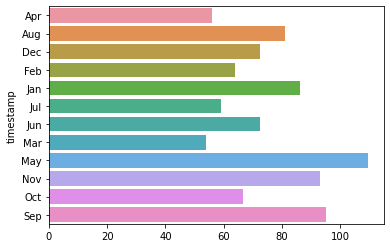

In [71]:
# Todo: plot podcast listening vs music listening
# damn i really spent most of january 2022 listening to podcats
# podm_gb = podm.groupby(by=podm.index).sum(numeric_only=True)

def plothpm(df_gb):
    sns.barplot(data=df_gb.iloc[0:0], x=df_gb.values, y=df_gb.index)

plothpm(hpm(no_skip_df))

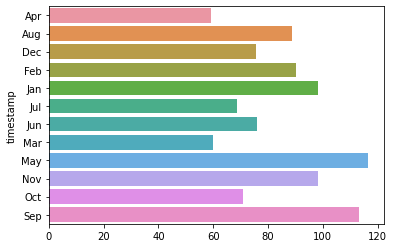

In [67]:
plothpm(hpm(streams_af_df))

In [32]:
from main_data import unpickl
import pandas as pd
import numpy as np
import_all()
pod = pod_df.copy()

def custom_mean(df):
    return df.mean(skipna=True)

In [ ]:
# import_all()
#Todo: figure out which level of this 
pod = pod_df.copy()
pod.loc[:, "hours"] = pod_df.loc[:, "playtime"].copy() / 3600
pod.index = pod.timestamp
podm = pod.copy().loc[:,'hours'].resample("M").apply(lambda x: np.sum(x.values)).round()
podm_gb = podm.groupby(podm.index.strftime("%b")).resample("Y").apply(lambda x: np.sum(x.values)).round().droplevel(level=1)
podm_gb = podm_gb.groupby(podm_gb.index).mean()
podm_gb


In [ ]:
# avg per month

import matplotlib as plt
plt.rcParams['figure.figsize']=(8,8)
sns.barplot(data=podm_gb, x=podm_gb["hours"], y=podm_gb.index)

In [5]:
def hpm(pod):
    #pod = pod_df.copy()
    pod.loc[:, "hours"] = pod.loc[:, "playtime"].copy() / 3600
    pod.index = pod.timestamp
    podm = pod.copy().loc[:,'hours'].resample("M").apply(lambda x: np.sum(x.values)).round()
    podm_gb = podm.groupby(podm.index.strftime("%b")).resample("Y").apply(lambda x: np.sum(x.values)).round().droplevel(level=1)
    podm_gb = podm_gb.groupby(podm_gb.index).mean()
    return podm_gb

podm_gb = hpm(pod_df)

NameError: name 'streams_df' is not defined

In [44]:
podm_gb

timestamp
Apr     59.333333
Aug     88.750000
Dec     75.666667
Feb     90.333333
Jan     98.333333
Jul     68.750000
Jun     76.000000
Mar     60.000000
May    116.333333
Nov     98.333333
Oct     71.000000
Sep    113.000000
Name: hours, dtype: float64